In [1]:
import os
import numpy as np

import pandas as pd
from tqdm import tqdm
from patsy import dmatrix
from itertools import product 
import datetime
from datetime import datetime as dt
from dateutil.relativedelta import *

pd.options.display.float_format = '{:.4f}'.format

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
df = pd.read_csv('/content/billionaires_cleansed.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2614 non-null   object 
 1   rank                      2614 non-null   int64  
 2   year                      2614 non-null   int64  
 3   company.founded           2614 non-null   int64  
 4   company.name              2576 non-null   object 
 5   company.relationship      2568 non-null   object 
 6   company.sector            2591 non-null   object 
 7   company.type              2578 non-null   object 
 8   demographics.age          2614 non-null   int64  
 9   demographics.gender       2580 non-null   object 
 10  location.citizenship      2614 non-null   object 
 11  location.country code     2614 non-null   object 
 12  location.gdp              2614 non-null   float64
 13  location.region           2614 non-null   object 
 14  wealth.t

In [17]:
frame_info = [(col, len(df[col].unique()), 
              df[col].isnull().sum(), 
              df[col].dtype,
              df[col].unique()[:10]) for col in df.columns]

df_info = pd.DataFrame(frame_info,
                       columns=['col_name', 'num_of_unique', 'num_of_nan', 'dtype', 'front10_values'])


df_info 

,col_name,num_of_unique,num_of_nan,dtype,front10_values
0,name,2077,0,object,"[Bill Gates, Warren Buffett, Carlos Slim Helu,..."
1,rank,468,0,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
2,year,3,0,int64,"[1996, 2001, 2014]"
3,company.founded,178,0,int64,"[1975, 1962, 1990, 1896, 1976, 1977, 1839, 191..."
4,company.name,1578,38,object,"[Microsoft, Berkshire Hathaway, Telmex, F. Hof..."
5,company.relationship,46,46,object,"[founder, nan, founder, chairman, Relation, re..."
6,company.sector,518,23,object,"[ Software, Finance, Communications, pharmac..."
7,company.type,13,36,object,"[new, privatization, acquired, new/aquired, na..."
8,demographics.age,73,0,int64,"[40, 45, 58, 65, 70, 74, 0, 48, 77, 68]"
9,demographics.gender,4,34,object,"[male, nan, female, married couple]"


In [26]:
df[df['location.region']!=0].groupby('year')['location.region'].value_counts()

year  location.region         
1996  North America               141
      East Asia                   116
      Europe                      104
      Latin America                40
      Middle East/North Africa     17
      South Asia                    3
      Sub-Saharan Africa            2
2001  North America               289
      Europe                      124
      East Asia                    68
      Latin America                28
      Middle East/North Africa     22
      South Asia                    4
      Sub-Saharan Africa            2
      0                             1
2014  North America               562
      Europe                      470
      East Asia                   351
      Latin America               114
      Middle East/North Africa     78
      South Asia                   62
      Sub-Saharan Africa           16
Name: location.region, dtype: int64

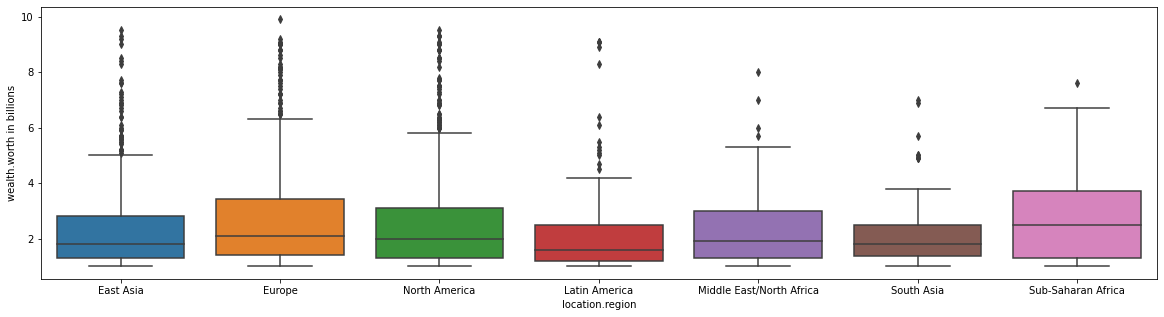

In [56]:
compact_df = df.loc[df['wealth.worth in billions']<10]
compact_df = compact_df.loc[compact_df['location.region']!='0']
plt.figure(figsize=(20,5))
sns.boxplot(x=compact_df['location.region'], y=compact_df['wealth.worth in billions'])
plt.show()

[]

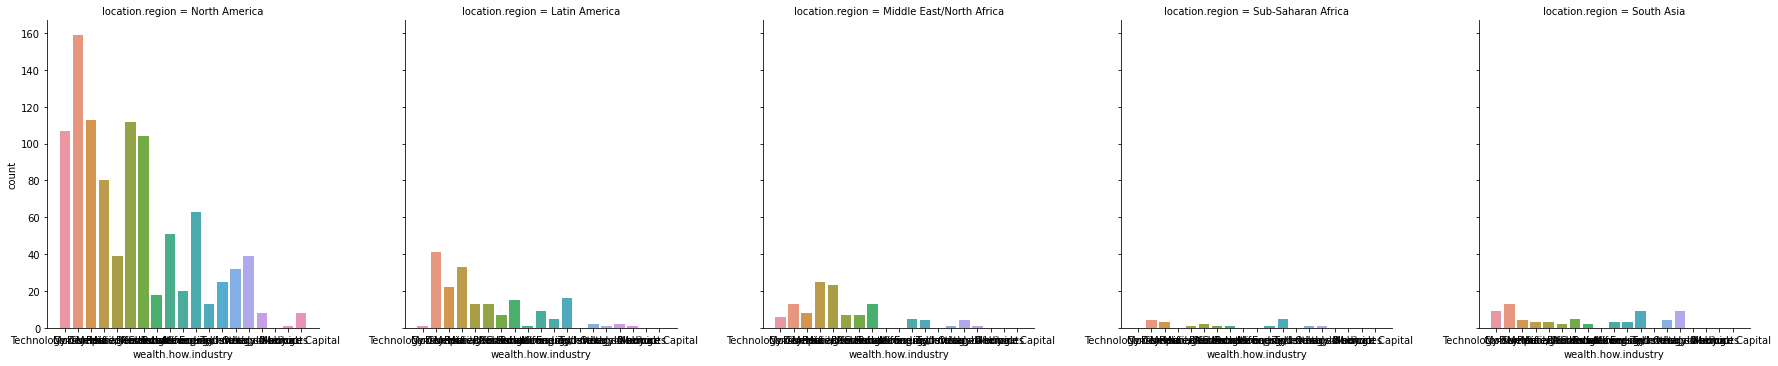

In [58]:
#지역별 industry별 
sns.catplot(data=t, x='wealth.how.industry', col='location.region', kind='count')
plt.plot()

In [113]:
top5_1996 = df[df['year']==1996].sort_values(by=['rank']).head(5)
top5_1996_name = top5_1996.name.unique()
# top1_2001 = df[df['year']==2001].sort_values(by=['rank']).head(5).index
# top1_2014 = df[df['year']==2014].sort_values(by=['rank']).head(5).index


top5_ts = df.loc[df['name'].isin(top5_1996_name)]

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,location.citizenship,location.country code,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,United States,USA,8100000000000.0000,North America,founder non-finance,18.5000,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,United States,USA,10600000000000.0000,North America,founder non-finance,58.7000,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,United States,USA,0.0000,North America,founder non-finance,76.0000,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,United States,USA,8100000000000.0000,North America,founder non-finance,15.0000,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,United States,USA,10600000000000.0000,North America,founder non-finance,32.3000,Traded Sectors,True,Consumer,not inherited,True,True
6,Oeri Hoffman and Sacher,3,1996,1896,F. Hoffmann-La Roche,NaN,pharmaceuticals,new,0,NaN,Switzerland,CHE,330000000000.0000,Europe,inherited,13.1000,New Sectors,True,Technology-Medical,3rd generation,True,True
9,Lee Shau Kee,4,1996,1976,Henderson Land Development,"founder, chairman",real estate,new,68,male,Hong Kong,HKG,160000000000.0000,East Asia,self-made finance,12.7000,Financial,True,Real Estate,not inherited,True,True
11,Warren Buffett,4,2014,1839,Berkshire Hathaway,founder,Finance,acquired,83,male,United States,USA,0.0000,North America,founder non-finance,58.2000,Traded Sectors,True,Consumer,not inherited,True,True
12,Tsai Wan-lin,5,1996,1962,Lin Yuan Group,founder,banking and insurance,new,71,male,Taiwan,Taiwan,0.0000,East Asia,self-made finance,12.2000,Financial,True,Hedge funds,not inherited,True,True
105,Lee Shau Kee,35,2014,1976,Henderson Land Development,"founder, chairman",real estate,new,86,male,Hong Kong,HKG,0.0000,East Asia,self-made finance,19.6000,Financial,True,Diversified financial,not inherited,True,True


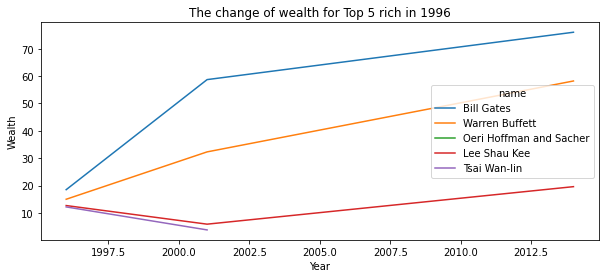

In [124]:
#@title 1996년 최고 부자 5명의 부의 변화(1996~2014)
#  top5_ts

plt.figure(figsize=(10,4))
sns.lineplot(data=top5_ts, x='year',y='wealth.worth in billions',hue='name')
plt.xlabel('Year')
plt.ylabel('Wealth')
plt.title('The change of wealth for Top 5 rich in 1996')
plt.show()

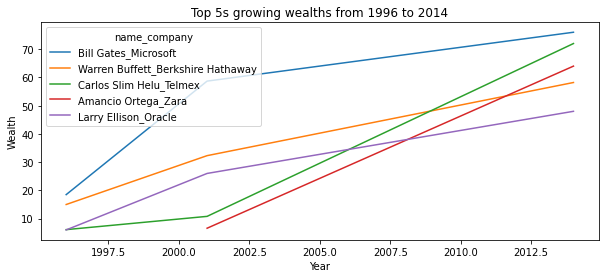

In [128]:
#@title 2014년 최고 부자 5명의 부의 변화(1996~2014)
top5_2014 = df[df['year']==2014].sort_values(by=['rank']).head(5)
top5_2014_name = top5_2014.name.unique()

top5_2014_ts = df.loc[df['name'].isin(top5_2014_name)]
top5_2014_ts['name_company'] = df['name'] + str('_') + df['company.name']

plt.figure(figsize=(10,4))
sns.lineplot(data=top5_2014_ts, x='year',y='wealth.worth in billions',hue='name_company')
plt.xlabel('Year')
plt.ylabel('Wealth')
plt.title('Top 5s growing wealths from 1996 to 2014')
plt.show()

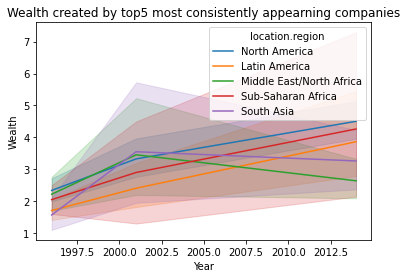

In [40]:
top5 = df.groupby('location.region')['year'].nunique().sort_values(ascending=False).head().index
t = df[df['location.region'].isin(top5)]

sns.lineplot(data=t,x='year',y='wealth.worth in billions',hue='location.region')
plt.xlabel('Year')
plt.ylabel('Wealth')
plt.title('Wealth created by top5 in the region')
plt.show()

<Figure size 1440x360 with 0 Axes>

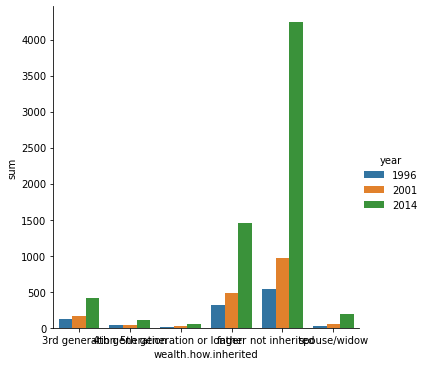

In [162]:
#@title 상속여부에 따른 부의 변화(1996~2014)
test = df.groupby(['year','wealth.how.inherited'])['wealth.worth in billions'].sum().reset_index()
test.rename(columns={'wealth.worth in billions':'sum'}, inplace=True)

plt.figure(figsize=(20,5))
sns.catplot(x="wealth.how.inherited", y="sum", hue="year", kind="bar", data=test)
plt.show()